This notebook shows examples of some basic operations that can be performed on a Bayesian Network. We use the Protein Signalling network from the bnlearn repository as the example model: https://www.bnlearn.com/bnrepository/discrete-medium.html#sachs

---
**Note:**
The `BayesianNetwork` class in pgmpy inherits the `networkx.DiGraph` class, hence all the methods defined for `networkx.DiGraph` should also work for `BayesianNetwork`.
---

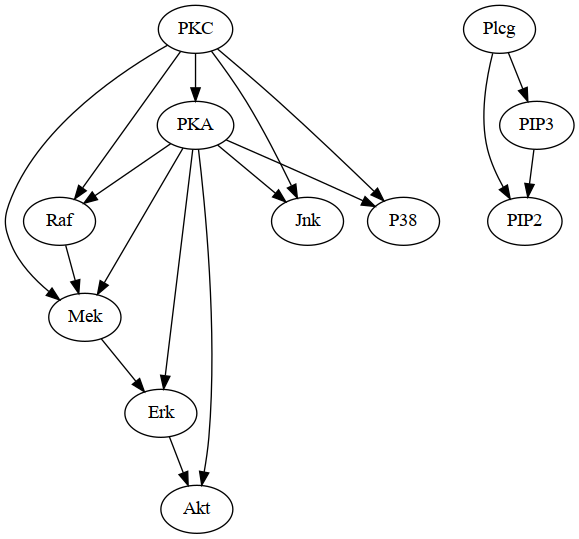

In [1]:
import pprint
from IPython.display import Image

# Load the sachs model. 
# For other ways to define a model, please refer: https://pgmpy.org/examples/Creating%20a%20Discrete%20Bayesian%20Network.html
from pgmpy.utils import get_example_model
sachs_model = get_example_model('sachs')

# Visualize the model
viz = sachs_model.to_graphviz()
viz.draw('sachs.png', prog='dot')
Image('sachs.png')

## Attributes of the Model Structure

In [2]:
# Get all the nodes/random variables in the model
all_nodes = sachs_model.nodes()
print(f"Nodes: {all_nodes} \n")

# Get all the edges in the model.
all_edges = sachs_model.edges()
print(f"Edges: {all_edges} \n")

# Get all the CPDs.
all_cpds = sachs_model.get_cpds()

# Get parents of a specific node
akt_parents = sachs_model.get_parents('Akt')
print(f"Parents of Akt: {akt_parents} \n")

# Get children of a specific node
pka_children = sachs_model.get_children('PKA')
print(f"Children of PKA: {pka_children} \n")

# Get all the leaf nodes of the model
leaves = sachs_model.get_leaves()
print(f"Leaf nodes in the model: {leaves} \n")

# Get the root nodes of the model
roots = sachs_model.get_roots()
print(f"Root nodes in the model: {roots} \n")

Nodes: ['Akt', 'Erk', 'Jnk', 'Mek', 'P38', 'PIP2', 'PIP3', 'PKA', 'PKC', 'Plcg', 'Raf'] 

Edges: [('Erk', 'Akt'), ('Mek', 'Erk'), ('PIP3', 'PIP2'), ('PKA', 'Akt'), ('PKA', 'Erk'), ('PKA', 'Jnk'), ('PKA', 'Mek'), ('PKA', 'P38'), ('PKA', 'Raf'), ('PKC', 'Jnk'), ('PKC', 'Mek'), ('PKC', 'P38'), ('PKC', 'PKA'), ('PKC', 'Raf'), ('Plcg', 'PIP2'), ('Plcg', 'PIP3'), ('Raf', 'Mek')] 

Parents of Akt: ['Erk', 'PKA'] 

Children of PKA: ['Akt', 'Erk', 'Jnk', 'Mek', 'P38', 'Raf'] 

Leaf nodes in the model: ['Akt', 'Jnk', 'P38', 'PIP2'] 

Root nodes in the model: ['PKC', 'Plcg'] 



## Modifying the Model Structure

In [3]:
# Adding nodes to the model.
sachs_model.add_node('new_node')
sachs_model.add_nodes_from(['new_node1', 'new_node2'])

# Adding edges to the model.
sachs_model.add_edge('Akt', 'new_node')
sachs_model.add_edges_from([('Akt', 'new_node1'), ('Akt', 'new_node2')])

# Removing edges from the model.
sachs_model.remove_edge('Akt', 'new_node')
sachs_model.remove_edges_from([('Akt', 'new_node1'), ('Akt', 'new_node2')])

# Removing nodes from the model
sachs_model.remove_node('new_node')
sachs_model.remove_nodes_from(['new_node1', 'new_node2'])

In [4]:
# At any point, check_model can be called to check if the specified model is correct.
sachs_model.check_model()

True

## Modifying associated parameterization

In [5]:
# Getting an associated CPD
sachs_model.get_cpds('Akt')

# Adding new CPDs to the model
sachs_model.add_node('new_node')
new_cpd = TabularCPD('new_node', 2, [[0.2], [0.8]])
sachs_model.add_cpds(new_cpd)

# Removing the CPD and the node
sachs_model.remove_cpds('new_node')
sachs_model.remove_node('new_node')

sachs_model.check_model()

True

## D-Separation

In [6]:
# Check if two variables in the network are conditionally / unconditionally d-connected.
print(sachs_model.is_dconnected('PKC', 'Akt'))
print(sachs_model.is_dconnected('PKC', 'Akt', observed=['Mek']))
print(sachs_model.is_dconnected('PKC', 'Akt', observed=['Mek', 'PKA']))

True
True
False


In [7]:
# List all the variables that are d-connected to a given variable.
print(sachs_model.active_trail_nodes('PKA'))
print(sachs_model.active_trail_nodes(['PKA', 'Raf']))

print()

# List all d-connected variables when conditioned on some other variables
print(sachs_model.active_trail_nodes('PKA', observed=['Mek', 'PKC']))
print(sachs_model.active_trail_nodes(['PKA', 'Raf'], observed=['Mek', 'PKC']))

{'PKA': {'PKC', 'PKA', 'Erk', 'P38', 'Raf', 'Akt', 'Mek', 'Jnk'}}
{'PKA': {'PKC', 'PKA', 'Erk', 'P38', 'Raf', 'Akt', 'Mek', 'Jnk'}, 'Raf': {'PKC', 'Raf', 'Erk', 'PKA', 'P38', 'Akt', 'Mek', 'Jnk'}}

{'PKA': {'Akt', 'Raf', 'PKA', 'P38', 'Erk', 'Jnk'}}
{'PKA': {'Akt', 'Raf', 'PKA', 'P38', 'Erk', 'Jnk'}, 'Raf': {'P38', 'Akt', 'Raf', 'PKA', 'Erk', 'Jnk'}}


In [8]:
# Find the minimal d-separator of any two variables
print(sachs_model.minimal_dseparator('PKC', 'Akt'))

{'Erk', 'PKA'}


## Other Methods

In [9]:
# Get the Markov blanket of a variable
sachs_model.get_markov_blanket('Raf')

['PKA', 'PKC', 'Mek']

In [10]:
# List all local indpeendencies of a node
sachs_model.local_independencies('Raf')

(Raf ⟂ PIP2, Plcg, P38, PIP3, Jnk | PKA, PKC)

In [12]:
# List all implied independencies in the network
sachs_model.get_independencies()

(PIP2 ⟂ PKC, Erk, P38, Raf, PKA, Akt, Mek, Jnk)
(PIP2 ⟂ Akt, Raf, PKA, Mek, Erk, P38, Jnk | PKC)
(PIP2 ⟂ PKC, Erk, P38, Raf, PKA, Akt, Mek, Jnk | Plcg)
(PIP2 ⟂ Akt, PKC, Raf, Mek, PKA, P38, Jnk | Erk)
(PIP2 ⟂ Akt, PKC, Raf, Mek, Erk, PKA, Jnk | P38)
(PIP2 ⟂ Akt, PKC, Raf, Mek, Erk, P38, Jnk | PKA)
(PIP2 ⟂ Akt, PKC, PKA, Mek, Erk, P38, Jnk | Raf)
(PIP2 ⟂ PKC, Erk, P38, Raf, PKA, Akt, Mek, Jnk | PIP3)
(PIP2 ⟂ PKC, Raf, PKA, Mek, Erk, P38, Jnk | Akt)
(PIP2 ⟂ Akt, PKC, Raf, PKA, Erk, P38, Jnk | Mek)
(PIP2 ⟂ Akt, PKC, Raf, PKA, Mek, Erk, P38 | Jnk)
(PIP2 ⟂ Akt, Raf, PKA, Mek, Erk, P38, Jnk | PKC, Plcg)
(PIP2 ⟂ Akt, Raf, Mek, PKA, P38, Jnk | Erk, PKC)
(PIP2 ⟂ Akt, Raf, Mek, Erk, PKA, Jnk | P38, PKC)
(PIP2 ⟂ Akt, Raf, Mek, Erk, P38, Jnk | PKA, PKC)
(PIP2 ⟂ Akt, PKA, Mek, Erk, P38, Jnk | Raf, PKC)
(PIP2 ⟂ Akt, Raf, PKA, Mek, Erk, P38, Jnk | PKC, PIP3)
(PIP2 ⟂ Raf, PKA, Mek, Erk, P38, Jnk | Akt, PKC)
(PIP2 ⟂ Akt, Raf, PKA, Erk, P38, Jnk | PKC, Mek)
(PIP2 ⟂ Akt, Raf, PKA, Mek, Erk, P38 | PKC, Jn